<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/DIFERENCIAS_FINITAS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
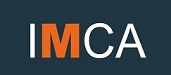

# Metodo de diferencias finitas explicito(MDF)-Ecuacion del Calor 1D

Sea la funcion :

$$ u(x,t):[0,L] \times \mathbb{R}_{0}^{+} \longrightarrow \mathbb{R}$$

Se define el problema de la ecucion de onda con condiciones de Direchelt a:

\begin{cases}
u_{t}=\alpha^{2}u_{xx} & \text{para } 0 \leqslant x \leqslant L \text{ y } 0 \leqslant t \leqslant T\\
u(0,t)=A \\
u(L,t)=B\\
u(x,0)=g(x)
\end{cases}

Hacemos una particion $\mathbb{P}$ del dominio [0,L] en "$n+1$" punto igualmente espaciados como:

$$\mathbb{P}=\{x_{0},x_{1},x_{2}, ... , x_{n}\}$$

Hacemos una particion $\mathbb{P'}$ del dominio [0,T] en "$m+1$" punto igualmente espaciados como:

$$\mathbb{P'}=\{t_{0},t_{1},t_{2}, ..... , t_{n}\}$$

Con la particion $\mathbb{P}$ se define los "$n$" elementos como:

$$  \bigtriangleup x=x_{i+1}-x_{i} \text{ , para   } i \in \{0,n-1\}$$

Y con la particion $\mathbb{P'}$ se define los "$m$" elementos como:

$$  \bigtriangleup t=t_{i+1}-t_{i} \text{ , para   } i \in \{0,m-1\}$$

Asi se tiene por diferencias finitas reemplazando en la ecucion de calor se tiene:

$$\frac{U_{j}^{n+1}-U_{j}^{n}}{\bigtriangleup t}=\alpha ^{2} ( \frac{U_{j+1}^{n}-2U_{j}^{n}-U_{j-1}^{n}}{ \bigtriangleup x ^{2}})$$

Haciendo:

$$ \lambda =\alpha ^{2} \frac{\bigtriangleup t}{\bigtriangleup x ^{2}} $$


Simplificando y reordenando se tiene la ecuacion iterativa:

$$U_{j}^{n+1}=U_{j-1}^{n}+(1-2\lambda)U_{j}^{n}+\lambda U_{j+1}^{n} $$

para $j=\{1,...,m-1\}$

Donde:

$U_{j}^{n}=u(x_{j},t_{n})$

Llevando a su forma matricial iterativa se tiene:


$$\begin{bmatrix}
U_{1}^{n+1} \\
U_{2}^{n+1} \\
U_{3}^{n+1} \\
...   \\
U_{m-2}^{n+1} \\
U_{m-1}^{n+1}
\end{bmatrix}=
\begin{bmatrix}
 1-2\lambda & \lambda & 0 & ... & 0 & 0 & 0 \\
\lambda & 1-2\lambda & \lambda & ... & 0 & 0 & 0 \\
0 & \lambda & 1-2\lambda & ...& 0 & 0 & 0 \\
... & ... & ... & ...& ... & ... & ... \\
0 & 0 & 0 & ... & \lambda & 1-2\lambda & \lambda \\
0 & 0 & 0 & ... & 0 & \lambda & 1-2\lambda
\end{bmatrix}
\begin{bmatrix}
U_{1}^{n} \\
U_{2}^{n} \\
U_{3}^{n} \\
...   \\
U_{m-2}^{n} \\
U_{m-1}^{n}
\end{bmatrix}
+\lambda
\begin{bmatrix}
U_{0}^{n} \\
0  \\
0 \\
... \\
0  \\
U_{m}^{n}
\end{bmatrix}
$$

Asi se tiene el siguiente esquema iterativo matricial:

$$U^{n+1}=A U^{n}+\lambda  U0 $$


Ejemplo de aplicacion:

\begin{cases}
u_{t}=\alpha^{2}u_{xx} & \text{para } 0 \leqslant x \leqslant L=1 \text{ y } 0 \leqslant t \leqslant T=50\\
u(0,t)=0 \\
u(L,t)=0\\
u(x,0)=g(x)=sin(\pi x)
\end{cases}

 ECUACION DE CALOR 1D - DIFERENCIAS FINITAS EXPLICITO
#######################################################

------------------------------------------------------
[1] DEFINICION DE PARAMETROS
------------------------------------------------------

Intervalo en x:
[a,b]=[0,1]

Intervalo en t:
[0,T]=[0,50]

Condicion de contorno:
ua=u(0,t)=0 , ub=u(1,t)=0

Numero de puntos en espacio (x):
10

Numero de puntos en tiempo (t):
10

Vector puntos t_i:
[0.0, 5.555555555555555, 11.11111111111111, 16.666666666666664, 22.22222222222222, 27.77777777777778, 33.33333333333333, 38.888888888888886, 44.44444444444444, 50.0]

Vector puntos x_i:
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]

------------------------------------------------------
[2] GENERACION DE LA MALLA Y CONDICIONES DE BORDE
------------------------------------------------------

Malla Inicializacion
[[0. 0. 

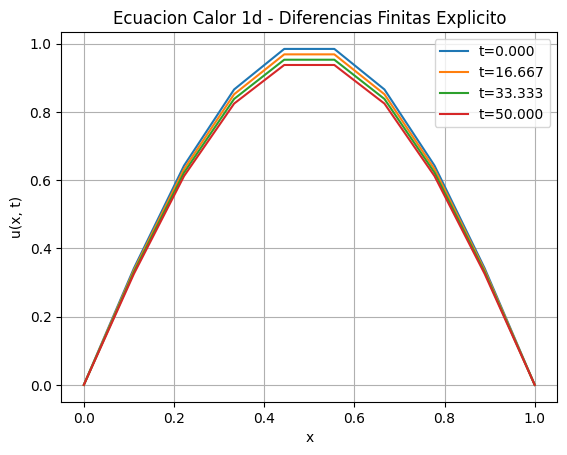

In [1]:
import numpy as np
import matplotlib.pyplot as plt


print(" ECUACION DE CALOR 1D - DIFERENCIAS FINITAS EXPLICITO")
print("#######################################################")

#[1] DEFINICION DE PARAMETROS
print("\n------------------------------------------------------")
print("[1] DEFINICION DE PARAMETROS")
print("------------------------------------------------------")
#limites del intervalo del espacio
a=0 #limite inferior del intervalo
b=1 #limite superior del intervalo
L=b-a # longitud de la barra
T = 50  # tiempo total
alpha = 0.01  # difusividad térmica
#condiciones frontera para t=0
ua=0
ub=0
#numero de puntos en el espacio m+1
m=9
#ancho de cada elemento en la variable espacio
dx=(b-a)/m
#total de puntos x
x=[a+i*dx for i in range(0,m+1)]

#numero de puntos en el tiempo n+1
n=9
#ancho de cada elemento en la variable espacio
dt=T/n
#total de puntos x
t=[0+i*dt for i in range(0,n+1)]

print('\nIntervalo en x:')
print(f"[a,b]=[{a},{b}]")

print('\nIntervalo en t:')
print(f"[0,T]=[0,{T}]")

print('\nCondicion de contorno:')
print(f"ua=u({a},t)={ua} , ub=u({b},t)={ub}")
print('\nNumero de puntos en espacio (x):')
print(m+1)
print('\nNumero de puntos en tiempo (t):')
print(n+1)
print('\nVector puntos t_i:')
print(t)
print('\nVector puntos x_i:')
print(x)


#[1] GENERACION DE LA MALLA
print("\n------------------------------------------------------")
print("[2] GENERACION DE LA MALLA Y CONDICIONES DE BORDE")
print("------------------------------------------------------")

# Condiciones iniciales y de frontera u(x,0)=g(x)
def g(x):
    return np.sin(np.pi * x)

# Inicializar la malla
u = np.zeros((m+1, n+1))
print("\nMalla Inicializacion")
print(u)

# Condición inicial
for i in range(1,m):
    u[i, 0] = g(a+i*dx)
print("\nCondicion Inicial")
print(u[:, 0])

# Condiciones de frontera
for i in range(0,n+1):
    u[0, i] = ua
    u[m, i] = ub

#[3] ANALISIS DE ESTABILIDAD
print("\n------------------------------------------------------")
print("[3] ANALISIS DE ESTABILIDAD")
print("------------------------------------------------------")
#analisando la condicion de estabilidad
lamda= (alpha**2) * dt / dx**2
print("\nParametro de estabilidad")
print(f"lambda={lamda:0.8f}")

if lamda<1:
  print(f"\nCondicion estable, lambda={lamda:0.8f}<1")
else:
  print(f"\nCondicion no estable, lambda={lamda:0.8f}>1")
  print("Saliendo del programa...")
  quit()

#[4] DEFINICION DE LA MATRIZ A
print("\n------------------------------------------------------")
print("[4] DEFINICION DE LA MATRIZ A")
print("------------------------------------------------------")
A=np.zeros((m-1,m-1))
for i in range(0,m-1):
  A[i,i]=1-2*lamda
for i in range(0,m-2):
  A[i,i+1]=A[i+1,i]=lamda
print("\nMatriz A")
print(A)

#[5] ESQUEMA EXPLICITO PARA EL CALCULO
print("\n------------------------------------------------------")
print("[5] ESQUEMA EXPLICITO  U^{n+1}=AU^{n}+U0")
print("------------------------------------------------------")
U0=np.zeros((m-1))
U0[0]= ua
U0[m-2]=ub
print("\nVector U0")
print(U0)

# Iteración del método explícito, matricialmente
for i in range(0,n):
  u[1:m,i+1]=A@u[1:m,i]+lamda*U0

# Establecer opciones de impresión
np.set_printoptions(precision=5, suppress=True)
np.set_printoptions(linewidth=100)
print("\nMatriz u con lo calculos")
print(u)


#[6] PLOTEO DE LAS SOLUCIONES APROXIMADAS
print("\n------------------------------------------------------")
print("[6] PLOTEO DE LAS SOLUCIONES APROXIMADAS")
print("------------------------------------------------------")
# Visualización de los resultados
x = np.linspace(0, L, m+1)
for i in range(0, n+1, n//3):
    plt.plot(x, u[:, i], label=f't={i*dt:.3f}')

# Añadir títulos y etiquetas
plt.title('Ecuacion Calor 1d - Diferencias Finitas Explicito')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.grid(True)
plt.show()
